In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import scipy
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

%run ../Scripts/trajectory.py
%run ../Scripts/trajectoryVisual.py
%run ../Scripts/trajsTree.py
%run ../Scripts/supMethods.py
%run ../Scripts/formulas.py


In [129]:
i = 11
foldername = f"../Data/test{i}"
with open(foldername + "/params.json") as json_file:
    params = json.load(json_file)
with open(foldername + "/sim_params.json") as json_file:
    sim_params = json.load(json_file)

init_list = []
tree_index = 0
tree_path = foldername + f"/trajs_trees/tree{tree_index}.json"
while(os.path.isfile(tree_path)):
    print("tree loaded:", tree_index)
    init_list.append(TreeNode.load_tree(tree_path))
    tree_index += 1
    tree_path = foldername + f"/trajs_trees/tree{tree_index}.json"

tree loaded: 0


Text(0, 0.5, 'velocity')

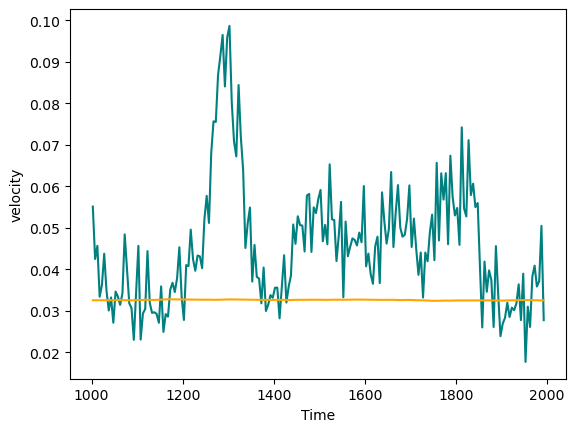

In [130]:
velocity_obs = np.array([])
velocity_calc = np.array([])

for root_node in init_list:
    for trajs in root_node.get_all_traversals():
        positions = [x.mean for x in trajs]
        time = [x.frame for x in trajs]
        time_avg = average_of_pairs(time)
        
        counts = np.array([x.count for x in trajs])
        counts_avg = average_of_pairs(counts)

        x_val, y_val = extract_xy(positions)
        if isinstance(x_val, np.ndarray):
            dt = np.diff(time)
            v_obs = np.sqrt(np.diff(x_val)**2 + np.diff(y_val)**2)/dt
            velocity_obs = np.concatenate([velocity_obs, v_obs], axis = 0)

            v_calc = calculate_velocity(counts_avg, params, sim_params)
            velocity_calc = np.concatenate([velocity_calc, v_calc], axis = 0)

            plt.plot(time_avg, v_obs, color = 'teal')
            plt.plot(time_avg, v_calc, color = 'orange')
# plt.ylim(0, 0.2)
plt.xlabel("Time")
plt.ylabel("velocity")

In [117]:
v_obs_mean = []
v_obs_var = []
v_calc_mean = []
v_calc_var = []

In [131]:
v_obs_mean.append(np.mean(velocity_obs))
v_obs_var.append(np.var(velocity_obs))
v_calc_mean.append(np.mean(velocity_calc))
v_calc_var.append(np.var(velocity_calc))

Text(0, 0.5, 'ObservedVelocity')

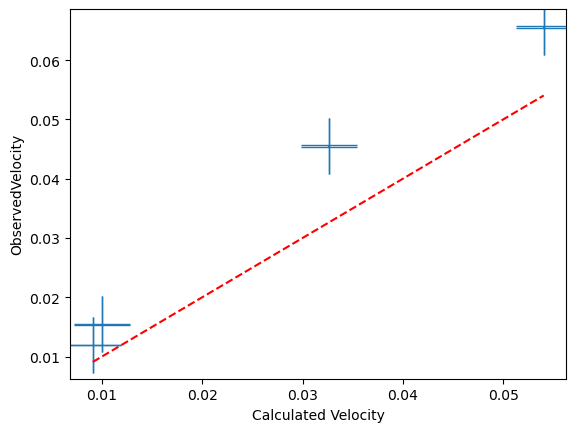

In [145]:
plt.figure()
plt.errorbar(v_calc_mean, v_obs_mean, xerr= v_calc_var,
             yerr = v_obs_var, linestyle = "None", capsize = 20)
# plt.scatter(population_mean, velocity_mean)
# plt.scatter(v_calc_mean, v_obs_mean, color = "orange")

line_x = np.linspace(min(v_calc_mean), max(v_calc_mean), 100)
line_y = line_x

# Plot the diagonal line
plt.plot(line_x, line_y, color='red', linestyle='--')

plt.xlabel("Calculated Velocity")
plt.ylabel("ObservedVelocity")
            #  yerr = velocity_var, xerr = population_var)